In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import sys
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline 

# Competition - to be rephrased (large part copied from competition page)

## Description 
Based on aspects of building location and construction, your goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.
Can be used to validate possible outcomes from earthquakes in the future, shorten time to deliver help and estimate extend of catastrophe, help better plan buildings creation in areas of often earthquakes.
Data set is interesting because it's one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

## Goal
Competition is a multi-label classification problem with labels:
- 1 represents low damage
- 2 represents a medium amount of damage
- 3 represents almost complete destruction

Metric to review score is micro averaged F1 score.

Current top preformes got results over 0.75

# OSEMN

Definition:
- project phases with proposed (names, actions, order, outcomes)
- mentioned (with naming) at http://www.dataists.com/2010/09/a-taxonomy-of-data-science/ (Hilary Manson in 2010)
- structurized an abstract list of steps to perform during DataScience project
- does not enforce any concreate action
- Concentrates on data flow and understanding
- does not describe model productioning, deployment, monitoring

Phases:
Name of the phase tells us about the artifact
- Obtain - get data (obtained data)
- Scrub - clean data (scrubbed data)
- Explore - understand data (insights from explored data)
- Model - create predictive models, validate hipotesis (model/models)
- Interpret - share results (data interpretation)

***
**TODO**
- Add Competition context to all steps

## Part connecting Competiton with OSEMN
- OSEMN used as a frame to effitiently perform project
- Competition - task to do
- Help to structurize DataScientist work (especially for young adepts)
- Help put correct order for actions to get best results
- ...
***
TODO:
- fill reasons why used OSEMN!

## OSMEN - Obtain Data
- Obtain Data from different sources
    - Files – csv, tsv, flat files, jsons, Excel format
    - Web APIs
    - Webpage crawlers
    - Databases
- Merge data from many files discovering columns by which they are connected
- Use your own eyes to see if loaded correctly
- Document data schemas/sources
- More sources = more scrubing work but also more data! Balance it.

In [3]:
#Load data
train_values = pd.read_csv('data/train_values.csv', index_col='building_id')
train_values.sort_index(inplace=True)
train_labels = pd.read_csv('data/train_labels.csv', index_col='building_id')
train_labels.sort_index(inplace=True)
test_values = pd.read_csv('data/test_values.csv', index_col='building_id')
test_values.sort_index(inplace=True)

train_values.shape, train_labels.shape

((260601, 38), (260601, 1))

In [4]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0
8,17,409,12182,2,0,13,7,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
12,17,716,7056,2,5,12,6,o,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
16,4,651,105,2,80,5,4,n,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
17,3,1387,3909,5,40,5,10,t,r,n,f,q,o,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels.head()

,damage_grade
building_id,
4,2
8,3
12,3
16,2
17,2


## OSEMN - Scrub Data

This phase can take a lot of time but is **essential** and usually improves results more than using advanced algoritms

- Handle missing values (use mask or sentinel value)
- Remove columns with constant data (or almost constant)
- Remove duplicated columns or containing same information
- Generate derived features / simplify feature to atomic (engineer features)
- Transform dates to common format
- Handle data inconsistencies 
- Handle outliners
- Encode categorical features
- Scale features (do it last after removing all not neccessary data)
***
**TODO**
- handle outliners (check + cleanup)
- add scaling as last step

In [6]:
#Missing values
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 38 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non-null object
plan_configuration                        260601 n

In [7]:
# Encode
df_cleaned = pd.get_dummies(train_values)
df_cleaned.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,17,409,12182,2,0,13,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12,17,716,7056,2,5,12,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
16,4,651,105,2,80,5,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
17,3,1387,3909,5,40,5,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [8]:
df_test_enc = pd.get_dummies(test_values)
df_test_enc.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,10,151,708,2,25,8,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
13,9,445,203,1,20,3,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
49,10,760,4087,2,25,2,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
92,26,1023,11319,2,20,5,4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
100,4,1202,5735,1,5,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## NOT DONE!!! Outliners - using pyOD

In [13]:
#Outliners try with pyOD
# from pyod.models.pca import PCA
# clf = PCA()
# DOPASOWANIE CORUPTION % - PODZIEL NA ZBIOR TRAIN/TEST - dopasuj (używaj metod wizualnych!)

In [14]:
# from pyod.models.pca import PCA
# clf = PCA()
from pyod.models.knn import KNN

# Tune param contamination!
clf = KNN(contamination=0.18)
clf.fit(df_cleaned)
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

# get the prediction on the test data
# y_test_pred = clf.predict(df_test_enc)  # outlier labels (0 or 1)
# y_test_scores = clf.decision_function(df_test_enc)  # outlier scores

In [15]:
df_outliners = df_cleaned.copy()
df_outliners['outliner'] = y_train_pred
df_outliners['outliner_score'] = y_train_scores
# df_outliners[df_outliners['outliner']==0].hist(figsize=(100,100))

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cleaned)
pca_result.shape

(260601, 2)

In [17]:
pca.components_.shape

(2, 68)

In [18]:
pca.explained_variance_ratio_

array([0.98694809, 0.01264349])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98694809, 0.99959158])

In [20]:
for i in range(2):
    df_outliners['pca'+str(i)]=pca_result[:,i]

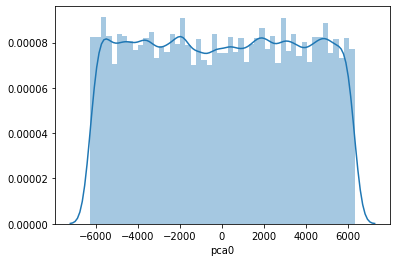

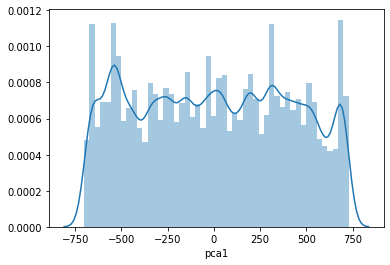

In [21]:
for i in range(2):
    sns.distplot(df_outliners['pca'+str(i)])
    plt.show()

In [ ]:
df_x = df_outliners[['pca0', 'pca1', 'outliner']].copy()
bins = 10
# df_x.pca0 = pd.cut(df_outliners.pca0, 20, include_lowest=True, duplicates='drop')
# df_x.pca1 = pd.cut(df_outliners.pca1, 10, include_lowest=True, duplicates='drop')
df_x.drop_duplicates(inplace=True)

df_x.head()

In [ ]:
sns.pairplot(data=df_x, hue='outliner')

In [25]:
# df_x.reset_index(inplace=True, drop=True)
df_x.pca0 = df_x.pca0.cat.codes
df_x.pca1 = df_x.pca1.cat.codes


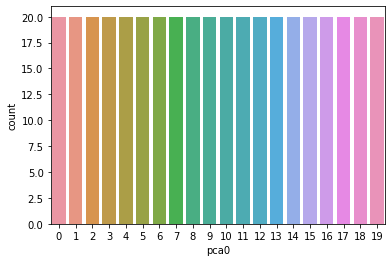

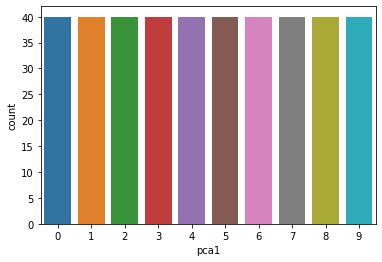

In [26]:
for i in range(2):
    sns.countplot(x=df_x['pca'+str(i)])
    plt.show()

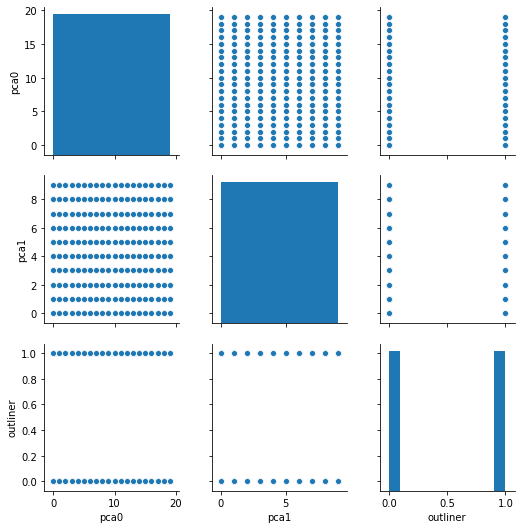

In [28]:
sns.pairplot(data=df_x)

In [43]:
df_outliners_test = df_test_enc.copy()
df_outliners_test['outliner'] = y_test_pred
df_outliners_test['outliner_score'] = y_test_scores
df_outliners_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,outliner,outliner_score
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,10,151,708,2,25,8,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.656854
13,9,445,203,1,20,3,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.414214
49,10,760,4087,2,25,2,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.358899
92,26,1023,11319,2,20,5,4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.236068
100,4,1202,5735,1,5,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4.123106


## OSEMN – Explore

EDA is for you to understand data, get both indept knowledge of it and possible hipotesis.
Use all available technics - visual checks, statistic checks, clustering algoritms to spot hidden patterns.
Cleaned the data - better the insights.

- Keep business question in your mind but DO NOT get stuck only on it. Get to KNOW your data. 
- Sampling (it's easier/faster to work on less data)
- Explore each column and identify data ranges (histograms)
- Correlations between different features (pairwise histograms)
- Clustering to spot data groups + analysis of groups to get insights
***
**TODO**
- histograms
- pairwise histograms
- clustering (?)

In [10]:
df_cleaned.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.00000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,0.136331,0.031911,0.831758,0.005556,0.040595,0.841117,0.054720,0.058012,0.701617,0.236285,0.062099,0.804368,0.001949,0.094370,0.09546,0.003853,0.152889,0.634234,0.046155,0.166722,0.050967,0.008952,0.775477,0.164604,0.000967,0.001247,0.959597,0.000084,0.000177,0.000146,0.000610,0.021842,0.001328,0.014002,0.021151,0.005652,0.962924,0.010272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.343140,0.175763,0.374082,0.074334,0.197350,0.365567,0.227433,0.233767,0.457549,0.424800,0.241335,0.396687,0.044108,0.292344,0.29385,0.061950,0.359881,0.481645,0.209821,0.372728,0.219930,0.094193,0.417269,0.370824,0.031082,0.035293,0.196902,0.009188,0.013285,0.012075,0.024693,0.146167,0.036413,0.117500,0.143888,0.074969,0.188948,0.100831
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

## OSEMN – Model
- Feature selection
- Do dimentions reduction if needed
- Split dataset – train/validation/test
- Balance dataset (oversampling / undersampling)
- Choose metric – for us chosen by competition organizer.
- Build model and tune, save it, review results on validation dataset.
- Choose best model (many competitions’ winners use ensemble of many models to increase models success metric)
***
**TODO**
- Feature selection
- Review definition what to do here!!! - @Maciek
- Hyperparam tunning
- SMOTE change + description how to do balancing
- change pipeline to remove scaling & transform (if needed separate one)

### SMOTE

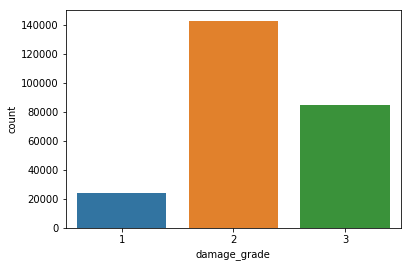

In [61]:
sns.countplot(data=train_labels, x='damage_grade')

In [62]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42, k_neighbors=5)
x_oversampled, y_oversampled = os.fit_resample(df_enc, train_labels['damage_grade'])

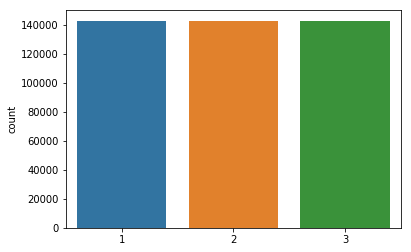

In [63]:
sns.countplot(x=y_oversampled)

### Model

In [64]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [65]:
pipe = make_pipeline(
    MinMaxScaler(), 
    PowerTransformer(standardize=False), 
    xgb.XGBClassifier(objective='multi:softmax', num_class=3, reg_lambda=0.8, )
)
pipe

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('powertransformer', PowerTransformer(copy=True, method='yeo-johnson', standardize=False)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, ga...      reg_lambda=0.8, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])

In [ ]:
param_grid={
    'xgbclassifier__base_score': [0.55],
     'xgbclassifier__colsample_bytree': [0.8],
     'xgbclassifier__max_depth': [12],
     'xgbclassifier__min_child_weight': [1],
     'xgbclassifier__n_estimators': [1000],
     'xgbclassifier__subsample': [0.8]
}
gs = GridSearchCV(pipe, param_grid, cv=3, n_jobs=3, verbose=4)
gs.fit(x_oversampled, y_oversampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

## OSEMN – iNterpret
- Get results from your model
- Create reports and aggregate conclusions
- Present all interesting information gathered during project to audience (take their interest into consideration).
- In competition, submit results for test set and check your score 

In [ ]:
test_enc = pd.get_dummies(test_values)
predictions = gs.predict(test_enc)

In [ ]:
submission_format = pd.read_csv('data/submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

In [ ]:
my_submission.to_csv('submission-v4-blog2.csv')

In [ ]:
!head submission-v4-blog2.csv

# Links
- http://www.dataists.com/2010/09/a-taxonomy-of-data-science/
- https://www.drivendata.org/competitions/57/nepal-earthquake
- 